<a href="https://colab.research.google.com/github/deysoumilee2005-lgtm/IMAGE-HANDLING-AND-IMAGE-CLASSIFICATION-/blob/main/FINAL_Copy_of_09_image_handling_and_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Title: Imagedata Augmentation and Image Classification

**Authors:** Koustab Ghosh<sup>1</sup> & Sujoy Kumar Biswas<sup>2</sup>

**Affiliation**:
1. Researcher, IDEAS-TIH, Indian Statistical Institute, Kolkata
2. Head of Research & Innovation, IDEAS-TIH, Indian Statistical Institute, Kolkata

**Dated**: Sep 07th, 2025


## I. Basic Image-Handling Processes with OpenCV

1. Reading and writing an image
2. Image transformations

Image transformations are important to augment the training dataset when the dataset size is small (i.e., the number of images is too few). In the following we shall see a few OpenCV functions to manage image data.

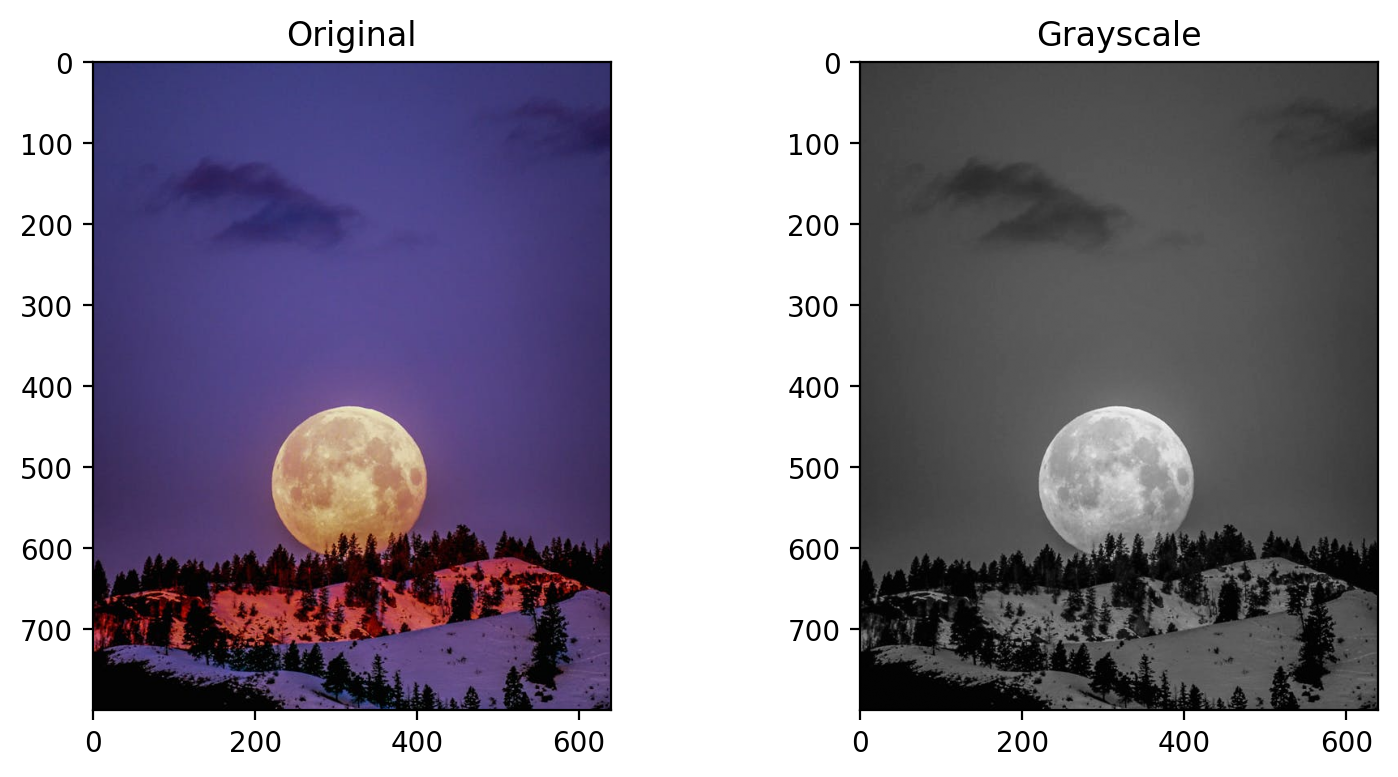

In [ ]:
# Method 1: Reading a color image an converting to grayscale image

import matplotlib.pyplot as plt
from PIL import Image

original = Image.open('/moon-pexels-frank-cone.jpg')
grayscale = original.convert('L')

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

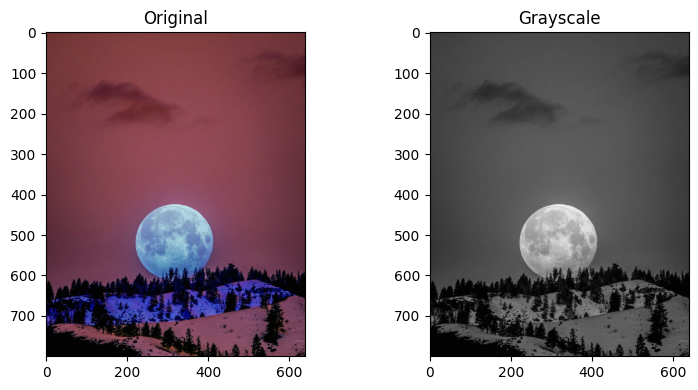

In [ ]:
# Method 2: Reading a color image an converting to grayscale image

import cv2
original = cv2.imread('/moon-pexels-frank-cone.jpg')

# Use the cvtColor() function to grayscale the image
grayscale = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap='gray')
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

## Question 1

Why do you think the color images displayed above look different (that is, Method 1 vs Method 2)?
## ANSWER:
The difference in the color images displayed between Method 1 (PIL) and Method 2 (OpenCV) is due to how these libraries handle color channels. PIL loads images in RGB format, while OpenCV loads them in BGR format.

In [ ]:
# Saving grayscale images
gray_moon_image = Image.open('/moon-pexels-frank-cone.jpg').convert('L')
gray_moon_image.save('graymoon.jpg')

## II. Various Image Transformation

1. Grayscale conversion
2. Shifting
3. Scaling


In [ ]:
import numpy as np

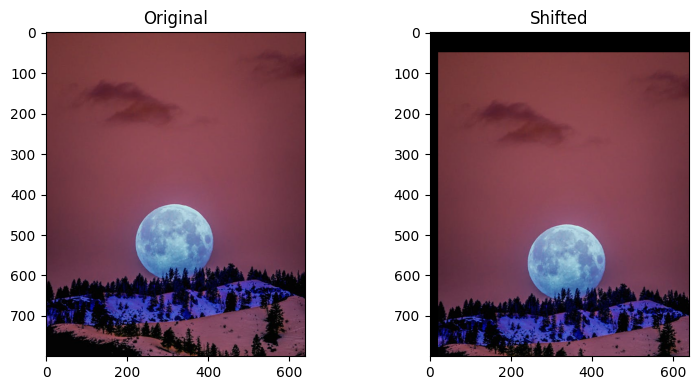

In [ ]:
M = np.float32([[1, 0, 20], [0, 1, 50]])
original = cv2.imread('/moon-pexels-frank-cone.jpg')
shifted = cv2.warpAffine(original, M, (original.shape[1], original.shape[0]))

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(shifted, cmap='gray')
ax[1].set_title("Shifted")

fig.tight_layout()
plt.show()


## Question 2

Implement the following types of image transformation with OpenCV functions:

1. Image resize
2. Image rotation


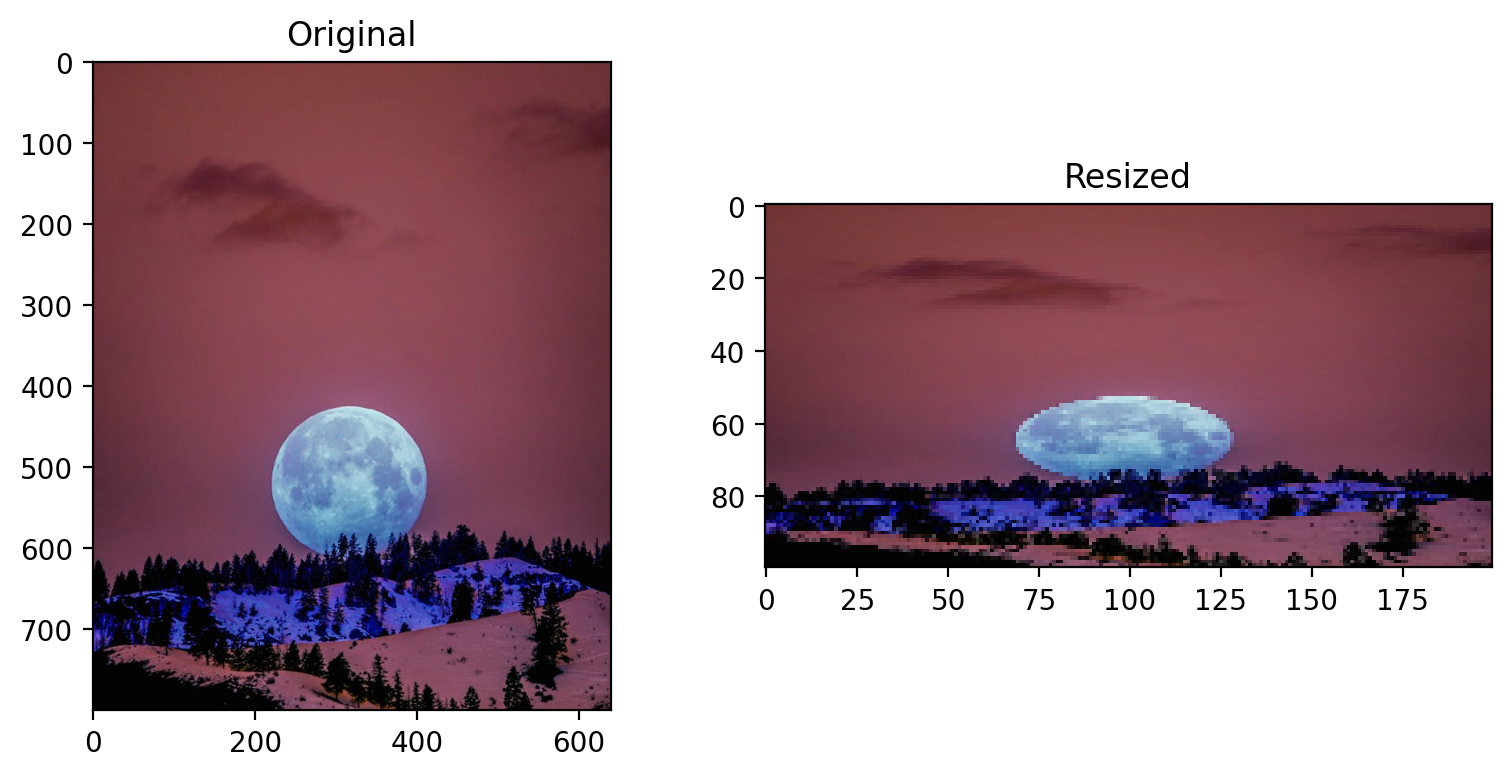

In [ ]:
# 1. IMAGE RESIZE
import cv2
original = cv2.imread('/moon-pexels-frank-cone.jpg')
resized = cv2.resize(original, (200, 100))
fig, axes = plt.subplots(1, 2, figsize=(8,4))
ax = axes.ravel()

ax[0].imshow(original, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(resized, cmap='gray')
ax[1].set_title("Resized")

fig.tight_layout()
plt.show()

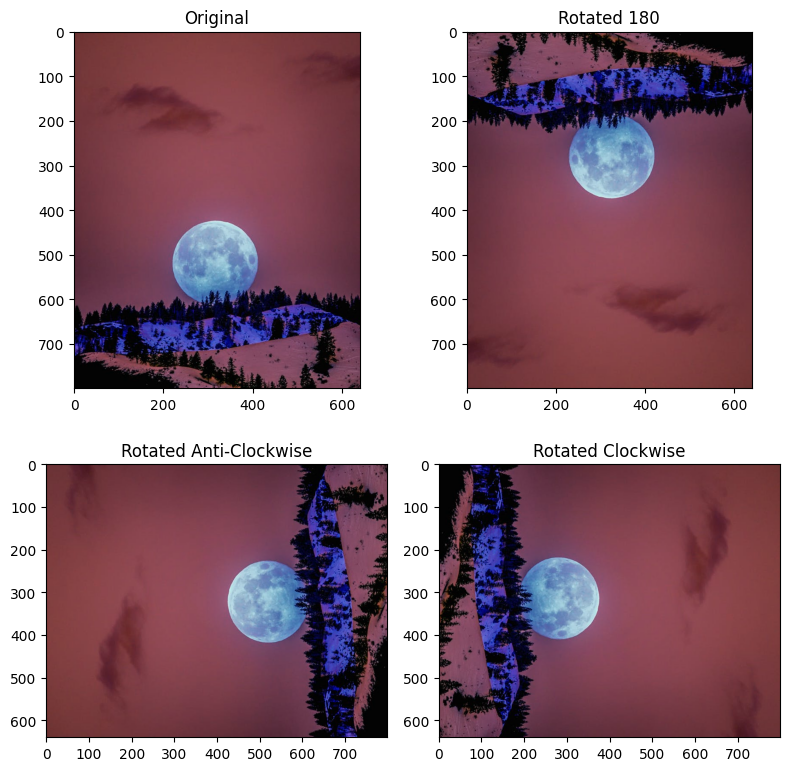

In [ ]:
# 2. IMAGE ROTATE
original = cv2.imread('/moon-pexels-frank-cone.jpg')
rotated_clockwise = cv2.rotate(original, cv2.ROTATE_90_CLOCKWISE)
rotated_anticlockwise = cv2.rotate(original, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated180 = cv2.rotate(original, cv2.ROTATE_180)

fig,axes =plt.subplots (2,2, figsize=(8,8))
ax = axes.ravel()

ax[0].imshow(original, cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(rotated180, cmap='gray')
ax[1].set_title("Rotated 180")
ax[2].imshow(rotated_anticlockwise, cmap='gray')
ax[2].set_title("Rotated Anti-Clockwise")
ax[3].imshow(rotated_clockwise, cmap='gray')
ax[3].set_title("Rotated Clockwise")
fig.tight_layout()
plt.show()

## III. Image Data Loader

In this part, we'll focus on laoding datasets and work with full-sized images, similar to those captured by smartphone cameras.

We'll utilize the Kaggle dataset of cat and dog photos (check teh associated zip file) to demonstrate how to load and utilize images for training neural networks.

The easiest way to load image data is with `datasets.ImageFolder` from `torchvision`. In general you'll use ImageFolder like so:

`dataset = datasets.ImageFolder('path/to/data', transform=transform)`

where 'path/to/data' is the file path to the data directory and transform is a sequence of processing steps built with the transforms module from torchvision.

ImageFolder expects the files and directories to be constructed like so:

```
root/dog/xxx.png
root/dog/xxy.png
root/dog/xxz.png

root/cat/123.png
root/cat/nsdf3.png
root/cat/asd932_.png
```

where each class has its own directory (cat and dog) for the images. The images are then labeled with the class taken from the directory name. So here, the image 123.png would be loaded with the class label cat. You can download the dataset already structured like this from here. I've also split it into a training set and test set.



In [ ]:
# Downlaod the cat and dog dataset
!wget https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip

--2025-09-18 13:22:29--  https://s3.amazonaws.com/content.udacity-data.com/nd089/Cat_Dog_data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.15.201.252, 52.217.106.30, 52.216.58.80, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.15.201.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 580495262 (554M) [application/zip]
Saving to: ‘Cat_Dog_data.zip’

Cat_Dog_data.zip    100%[===================>] 553.60M  89.5MB/s    in 9.9s    

2025-09-18 13:22:39 (55.8 MB/s) - ‘Cat_Dog_data.zip’ saved [580495262/580495262]



In [ ]:
# unzip the dataset
!unzip Cat_Dog_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Cat_Dog_data/train/dog/dog.8636.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.8636.jpg  
  inflating: Cat_Dog_data/train/dog/dog.7505.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.7505.jpg  
  inflating: Cat_Dog_data/train/dog/dog.1174.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.1174.jpg  
  inflating: Cat_Dog_data/train/dog/dog.9528.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.9528.jpg  
  inflating: Cat_Dog_data/train/dog/dog.1612.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.1612.jpg  
  inflating: Cat_Dog_data/train/dog/dog.8150.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.8150.jpg  
  inflating: Cat_Dog_data/train/dog/dog.7263.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.7263.jpg  
  inflating: Cat_Dog_data/train/dog/dog.11043.jpg  
  inflating: __MACOSX/Cat_Dog_data/train/dog/._dog.11043.jpg  
  inflating: Cat_Dog_data/train/dog/dog.634

With the `ImageFolder`` loaded, you have to pass it to a DataLoader`. The DataLoader takes a dataset (such as you would get from ImageFolder) and returns batches of images and the corresponding labels. You can set various parameters like the batch size and if the data is shuffled after each epoch.

```
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)
```

To get data out of `dataloader`, you need to loop through it or convert it to an iterator and call next().

```
## Looping through it, get a batch on each loop
for images, labels in dataloader:
    pass

## Get one batch
images, labels = next(iter(dataloader))
```

## IV. Image Transforms

We shall focus on image transforms to augment our dataset.
When you load in the data with ImageFolder, you'll need to define some transforms.

For example, the images are different sizes but we'll need them to all be the same size for training. You can either resize them with `transforms.Resize()` or crop with `transforms.CenterCrop()`, `transforms.RandomResizedCrop()`, etc. We'll also need to convert the images to PyTorch tensors with `transforms.ToTensor()`.

Typically you'll combine these transforms into a pipeline with `transforms.Compose()`, which accepts a list of transforms and runs them in sequence. It looks something like this to scale, then crop, then convert to a tensor:

```
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])
```

There are plenty of transforms available, study them in details.


In [ ]:
## Hint to question 3
import torch
from torchvision import datasets, transforms

data_dir = 'Cat_Dog_data/train'

transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(224),
                                transforms.ToTensor()])

dataset = datasets.ImageFolder(data_dir, transform=transform)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

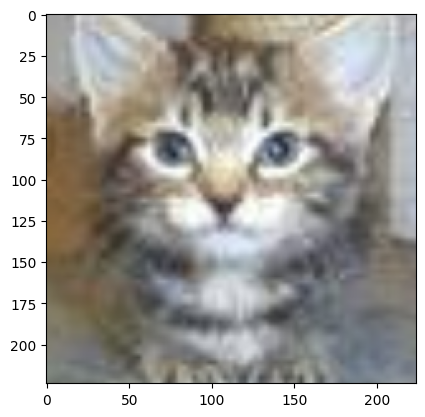

In [ ]:
# Display the images
# Run this to test your data loader
images, labels = next(iter(dataloader))
img = images[0].numpy().transpose((1, 2, 0))
plt.imshow(img, cmap='gray')
plt.show()


## Question 3

Load images from the Cat_Dog_data/train folder, define a few additional transforms, then build the dataloader.

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms

data_dir = 'Cat_Dog_data/train'
#  a few additional transforms
transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(0.3),
                                transforms.ColorJitter(brightness=1, contrast=0.4, saturation=0.4, hue=0.1),
                                transforms.RandomRotation(degrees=5),
                                transforms.ToTensor()])
#Load images
dataset1 = datasets.ImageFolder(data_dir, transform=transform)
# build the dataloader
dataloader1 = torch.utils.data.DataLoader(dataset1, batch_size=32, shuffle=True)

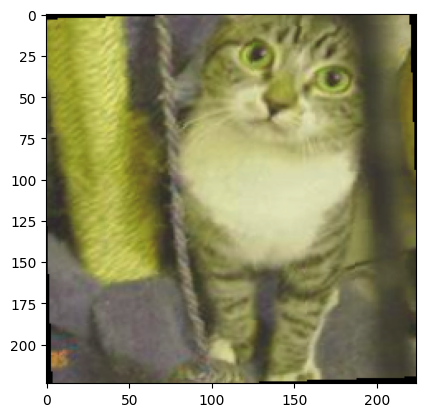

In [ ]:
#  Display the images
# TEST RUN
images, labels = next(iter(dataloader1))
img = images[0].numpy().transpose((1, 2, 0))
plt.imshow(img, cmap='gray')
plt.show()


## V. MNIST Classification with CNN (PyTorch)

We have seen how to load image data. Once the image data is loaded with class labels, we can do image classification.

1. Instantiate classifier
2. Download & load MNIST

However, to make things simple, we shall run on a simpler and smaller dataset of handwritten digits, '0' to '9'. This dataset is famously called MNIST handwritten image dataset.


In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 52.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.71MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.1MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.74MB/s]


## Question 4

Display a few images below to show how the MNIST dataset look like.

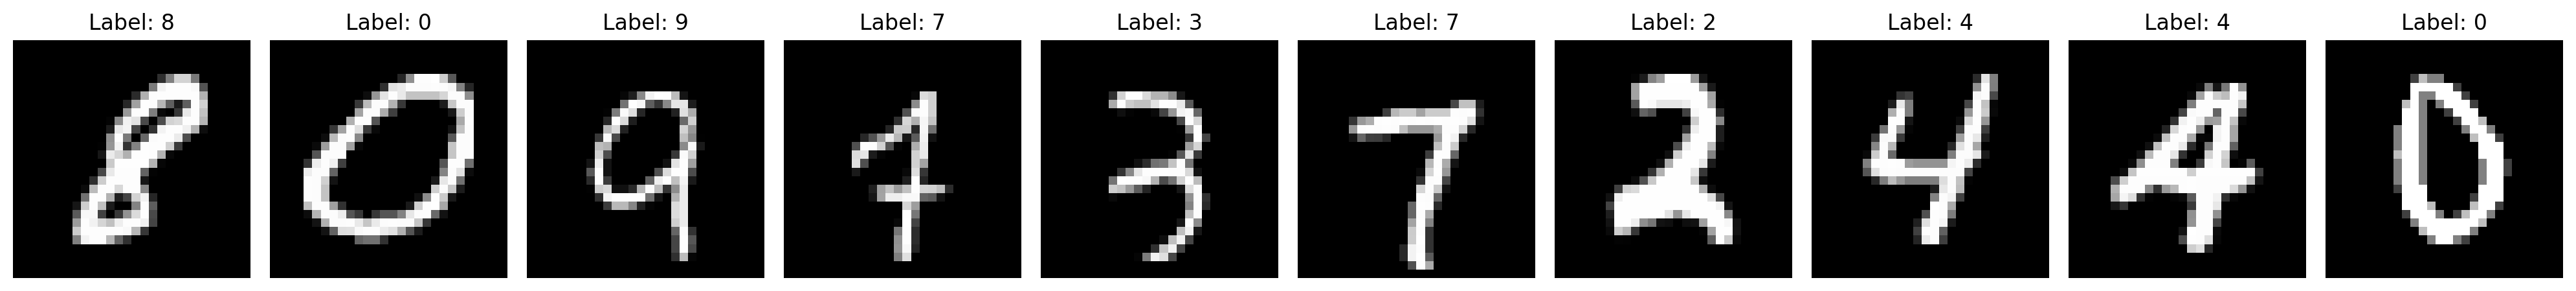

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of training data
images, labels = next(iter(trainloader))

# Display a few images
fig, axes = plt.subplots(1, 10, figsize=(20, 10))
for i in range(10):
    img = images[i].numpy().squeeze()
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"Label: {labels[i].item()}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

The next two steps are:

3. Build model
4. Train model

In [ ]:
# Model: Define your network architecture here

from torch import nn, optim
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x

In [ ]:
# Model instance creation and solver instance creation
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)


In [ ]:
# Train the network here

epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        log_ps = model(images)
        loss = criterion(log_ps, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.3289120864909468
Training loss: 0.16316894691254794
Training loss: 0.13368798849701102
Training loss: 0.11412731675294115
Training loss: 0.10576590357461511


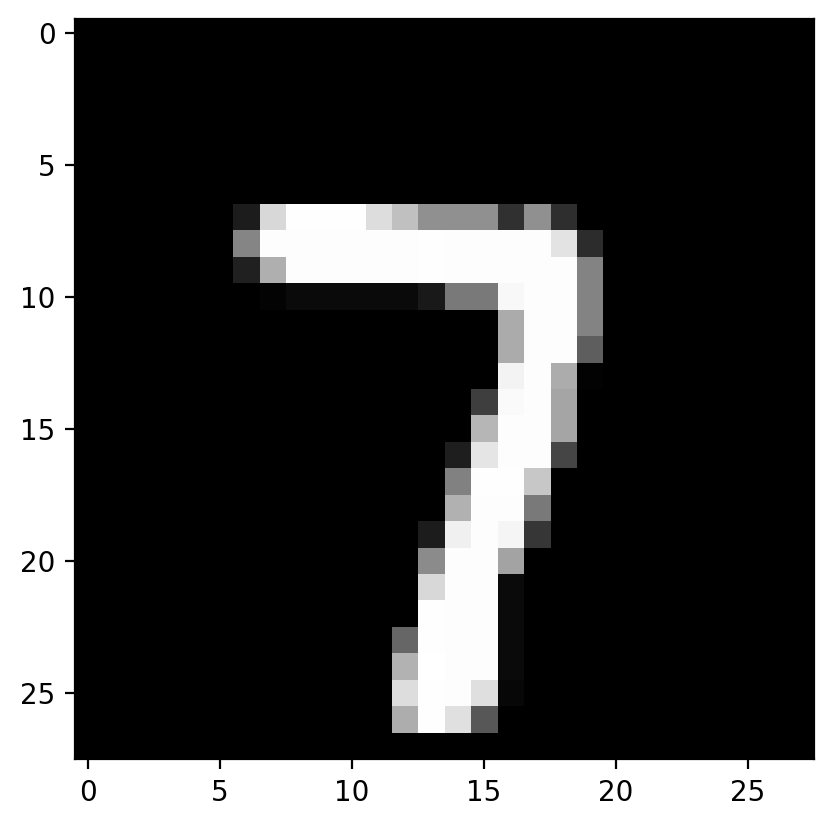

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

images, labels = next(iter(trainloader))
img = images[0].numpy().transpose((1, 2, 0))
plt.imshow(img, cmap='gray')
plt.show()


In [ ]:
# Calculate the class probabilities (softmax) for img
ps = torch.exp(model(images[0]))
print(ps)

tensor([[5.1640e-14, 4.8468e-09, 8.0458e-08, 1.4718e-06, 3.2446e-12, 3.2852e-12,
         2.5975e-16, 1.0000e+00, 2.6177e-11, 7.7267e-08]],
       grad_fn=<ExpBackward0>)


In [ ]:
# print the index that has the maximum value in ps
print(f"The predicted class is: {torch.argmax(ps)}")

The predicted class is: 7


## VI. MNIST Classification with CNN (Tensorflow-Keras)

We shall now train the MNIST classifier using the Tensorflow-Keras module

## Question 5

Write the entire MNIST image classification code using an object oriented approach using the Tensorflow Keras library
as below.

Importthe approproite modules.


```
class MNISTClassifier:
    def __init__(self):
        self.model: tf.keras.Model | None = None

    def load_data(self):
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.____()
        x_train = (x_train.astype("float32") / 255.0)[..., ____]
        x_test  = (x_test.astype("float32") / 255.0)[..., ____]
        return (x_train, y_train), (x_test, y_test)

    def build_model(self):
        self.model = ____.Sequential([
            ____.Conv2D(____, (3,3), activation="relu", input_shape=(28,28,1)),
            ____.MaxPooling2D((2,2)),
            ____.Conv2D(____, (3,3), activation="relu"),
            ____.MaxPooling2D((2,2)),
            ____.Flatten(),
            ____.Dense(____, activation="relu"),
            ____.Dense(____, activation="softmax"),
        ])
        self.model.compile(optimizer="adam",
                           loss="____",
                           metrics=[____])

    def train(self, x_train, y_train, epochs=____, batch_size=____):
        self.model.____(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    def evaluate(self, x_test, y_test):
        _, acc = self.model.____(x_test, y_test, verbose=0)
        print(f"Test Accuracy: {acc:.4f}")
        return acc

    def predict_with_opencv(self, x_test, y_test, num_samples=3, out_dir="mnist_opencv_samples", display=False):
        os.makedirs(out_dir, exist_ok=True)
        for i in range(num_samples):
            digit = (x_test[i] * 255).astype("uint8").squeeze(axis=-1)
            label = int(y_test[i])
            filename = os.path.join(out_dir, f"digit_{i}_label_{label}.png")
            ____.imwrite(filename, digit)

            img = ____.imread(filename, ____)
            img = ____.resize(img, (28, 28))
            img = img.astype("float32")/255.0
            img = np.expand_dims(img, axis=(0, -1))

            probs = self.model.____(img, verbose=0)
            pred_class = int(np.argmax(probs, axis=-1)[0])
            print(f"Sample {i}: True={label} | Pred={pred_class}")

            if display:
                try:
                    ____.imshow("digit", (img[0,...,0]*255).astype("uint8"))
                    ____.waitKey(500)
                    ____.destroyAllWindows()
                except ____.error:
                    print("GUI not available")

def run_step(step_no, title, func, *args, **kwargs):
    print(f"\n[Step {step_no}] {title}")
    result = func(*args, **kwargs)
    print(f"[Step {step_no}] Completed.")
    return result

```

And lastly the main code to execute all parts is written below.

```

EPOCHS = #set epoch number
BATCH_SIZE = 64

clf = run_step(1, "Instantiate classifier", ____)
(x_train,y_train), (x_test,y_test) = run_step(2, "Load MNIST", clf.____)
run_step(3, "Build model", clf.____)
run_step(4, "Train", clf.____, x_train, y_train, EPOCHS, BATCH_SIZE)
run_step(5, "Evaluate", clf.____, x_test, y_test)
run_step(6, "Predict with OpenCV", clf.____, x_test, y_test, 3)

```

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
# image classification using tensor flow
class MNISTClassifier:
    def __init__(self):
        self.model: tf.keras.Model | None = None

    def load_data(self):
        (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
        x_train = (x_train.astype("float32") / 255.0)[..., np.newaxis]
        x_test  = (x_test.astype("float32") / 255.0)[...,np.newaxis]
        return (x_train, y_train), (x_test, y_test)

    def build_model(self):
        self.model = tf.keras.Sequential([
          tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
          tf.keras.layers.MaxPooling2D((2,2)),
          tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
          tf.keras.layers.MaxPooling2D((2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(64, activation="relu"),
          tf.keras.layers.Dense(10, activation="softmax"),
        ])
        self.model.compile(optimizer="adam",
                           loss="sparse_categorical_crossentropy",
                           metrics=["accuracy"])

    def train(self, x_train, y_train, epochs=2, batch_size=64):
        self.model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

    def evaluate(self, x_test, y_test):
        _, acc = self.model.evaluate(x_test, y_test, verbose=0)
        print(f"Test Accuracy: {acc:.4f}")
        return acc

    def predict_with_opencv(self, x_test, y_test, num_samples=3, out_dir="mnist_opencv_samples", display=False):
        os.makedirs(out_dir, exist_ok=True)
        for i in range(num_samples):
            digit = (x_test[i] * 255).astype("uint8").squeeze(axis=-1)
            label = int(y_test[i])
            filename = os.path.join(out_dir, f"digit_{i}_label_{label}.png")
            cv2.imwrite(filename, digit)

            img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (28, 28))
            img = img.astype("float32")/255.0
            img = np.expand_dims(img, axis=(0, -1))

            probs = self.model.predict(img, verbose=0)
            pred_class = int(np.argmax(probs, axis=-1)[0])
            print(f"Sample {i}: True={label} | Pred={pred_class}")

            if display:
                try:
                    cv2.imshow("digit", (img[0,...,0]*255).astype("uint8"))
                    cv2.waitKey(500)
                    cv2.destroyAllWindows()
                except cv2.error:
                    print("GUI not available")

def run_step(step_no, title, func, *args, **kwargs):
    print(f"\n[Step {step_no}] {title}")
    result = func(*args, **kwargs)
    print(f"[Step {step_no}] Completed.")
    return result

EPOCHS = 2
BATCH_SIZE = 64

clf = run_step(1, "Instantiate classifier", MNISTClassifier)
(x_train,y_train), (x_test,y_test) = run_step(2, "Load MNIST", clf.load_data)
run_step(3, "Build model", clf.build_model)
run_step(4, "Train", clf.train, x_train, y_train, EPOCHS, BATCH_SIZE)
run_step(5, "Evaluate", clf.evaluate, x_test, y_test)
run_step(6, "Predict with OpenCV", clf.predict_with_opencv, x_test, y_test, 3)



[Step 1] Instantiate classifier
[Step 1] Completed.

[Step 2] Load MNIST
[Step 2] Completed.

[Step 3] Build model
[Step 3] Completed.

[Step 4] Train
Epoch 1/2
938/938 - 47s - 50ms/step - accuracy: 0.9488 - loss: 0.1707
Epoch 2/2
938/938 - 44s - 47ms/step - accuracy: 0.9837 - loss: 0.0547
[Step 4] Completed.

[Step 5] Evaluate
Test Accuracy: 0.9846
[Step 5] Completed.

[Step 6] Predict with OpenCV
Sample 0: True=7 | Pred=7
Sample 1: True=2 | Pred=2
Sample 2: True=1 | Pred=1
[Step 6] Completed.


In [ ]:
# Evaluate the PyTorch network
correct_count, all_count = 0, 0
for images, labels in trainloader:
    for i in range(len(labels)):
        img = images[i].view(1, 784)
        with torch.no_grad():
            logps = model(img)

        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.numpy()[i]
        if(true_label == pred_label):
            correct_count += 1
        all_count += 1

print(f"PyTorch Model Accuracy: {correct_count/all_count:.4f}")

PyTorch Model Accuracy: 0.9758
